In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    # math.e ** -x, 밑이 자연상수 e인 지수함수, e^-x
    return 1 / (1 + np.exp(-x))

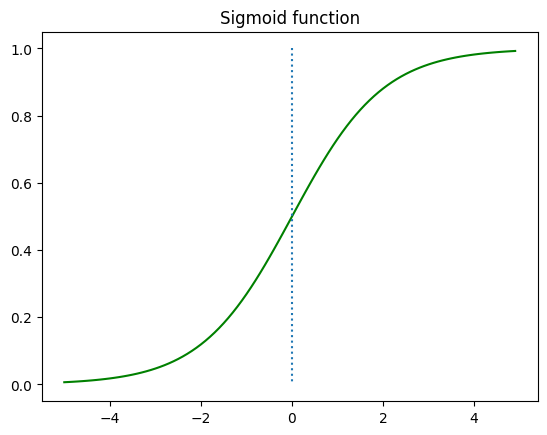

In [4]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, "g")
plt.plot([0, 0], [1.0, 0.0], ":")  # 가운데 점선 추가
plt.title("Sigmoid function")
plt.show()

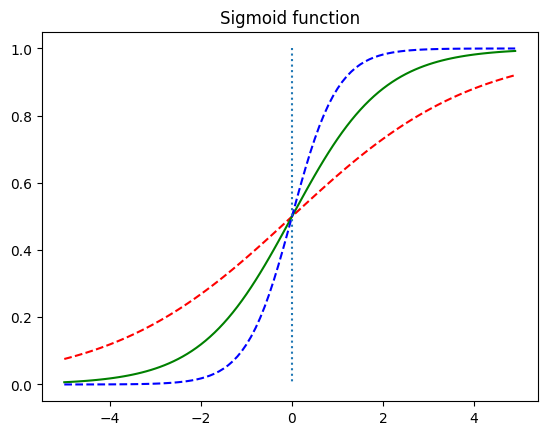

In [10]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5 * x)
y2 = sigmoid(x)
y3 = sigmoid(2 * x)

plt.plot(x, y1, "r", linestyle="--")  # w = 0.5
plt.plot(x, y2, "g")  # w = 1
plt.plot(x, y3, "b", linestyle="--")  # w = 2
plt.plot([0, 0], [1.0, 0.0], ":")  # 가운데 점선 추가
plt.title("Sigmoid function")

# w 값이 커지면 경사가 커지고 w 값이 작아지면 경사가 작아진다.
plt.show()

## b 값의 변화에 따른 좌 우 이동

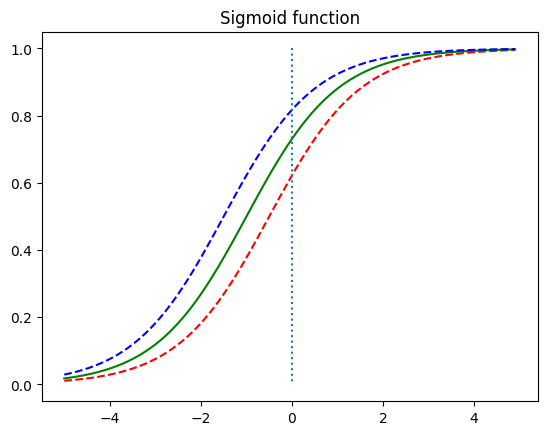

In [12]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x + 0.5)
y2 = sigmoid(x + 1)
y3 = sigmoid(x + 1.5)

plt.plot(x, y1, "r", linestyle="--")
plt.plot(x, y2, "g")
plt.plot(x, y3, "b", linestyle="--")
plt.plot([0, 0], [1.0, 0.0], ":")
plt.title("Sigmoid function")
plt.show()

## 시그모이드 함수
- H(x) = sigmoid(Wx + b)
- 입력값이 한없이 커지면 1에 수렴
- 입력값이 한없이 작아지면 0에 수렴
- 시그모이드 함수 출력값은 0과 1 사이의 값
- Threshold가 0.5라고 가정하고 출력값이 0.5 이상이면 true, 0.5이하면 false

## Loss function 정하기
- Linear regression에서 loss function으로 MSE를 사용
- Logistic regression에서 loss function으로 MSE를 사용할 경우 non-convex 형태의 그래프가 나오게 됨
- 오차가 최소값이 되는 구간이라고 판단했지만 아닐수도 있게 됨 (local minima)
- 실제값이 1일 때 예측값이 0에 가까워지면 오차가 커져야하며 실제값이 0일 때 예측값이 1에 가까워지면 오차가 커져야한다. (**로그함수**)


## 

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
torch.manual_seed(1)

In [3]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [
    [0],
    [0],
    [0],
    [1],
    [1],
    [1],
]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [4]:
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


In [5]:
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [6]:
hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))  # matrix multiplication
print(hypothesis)
print(y_train)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


In [7]:
# loss값
-(
    y_train[0] * torch.log(hypothesis[0])
    + (1 - y_train[0]) * torch.log(1 - hypothesis[0])
)

tensor([0.6931], grad_fn=<NegBackward0>)

In [8]:
losses = -(y_train * torch.log(hypothesis) + (1 - y_train) * torch.log(1 - hypothesis))

print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)


In [9]:
cost = losses.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


In [10]:
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

In [11]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W, b], lr=1)

nb_epochs = 1000
for nb_epoch in range(nb_epochs + 1):

    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    cost = -(
        y_train * torch.log(hypothesis) + (1 - y_train) * torch.log(1 - hypothesis)
    ).mean()

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if nb_epoch % 100 == 0:
        print(f"Epoch : {nb_epoch:4d}/{nb_epochs} Cost : {cost.item():6f}")

Epoch :    0/1000 Cost : 0.693147
Epoch :  100/1000 Cost : 0.134722
Epoch :  200/1000 Cost : 0.080643
Epoch :  300/1000 Cost : 0.057900
Epoch :  400/1000 Cost : 0.045300
Epoch :  500/1000 Cost : 0.037261
Epoch :  600/1000 Cost : 0.031673
Epoch :  700/1000 Cost : 0.027556
Epoch :  800/1000 Cost : 0.024394
Epoch :  900/1000 Cost : 0.021888
Epoch : 1000/1000 Cost : 0.019852


- 0과 1 사이의 값을 갖게 됨

In [12]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis)

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)


### 0.5가 넘으면 true
- 실제값 [[0], [0], [0], [1], [1], [1]]
- 결과값 false false false true true true


In [13]:
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


In [14]:
print(W)
print(b)

tensor([[3.2530],
        [1.5179]], requires_grad=True)
tensor([-14.4819], requires_grad=True)
